# Causal Prior Exploration

Here, we will play around with the causal prior that is represented by a (C)DAG, which dictates which variables affect which during forward sampling.



In [1]:
%load_ext autoreload
%autoreload 2

In [5]:
import torch
from pathlib import Path


import matplotlib.pyplot as plt
import seaborn as sns 
import logging
from pathlib import Path
import math
import lightning as pl
import normflows as nf
import numpy as np
import torch
import torch.nn as nn
import networkx as nx
from ciflows.distributions.multidistr import ClusteredCausalDistribution


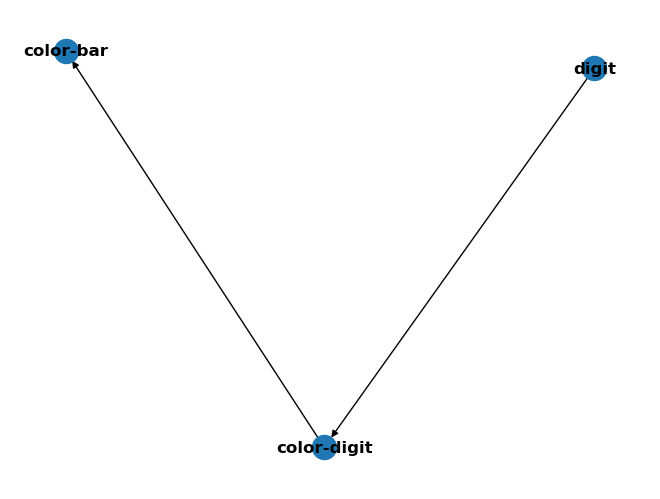

In [8]:
G = nx.DiGraph([('digit', 'color-digit'), ('color-digit', 'color-bar')])

nx.draw(G, with_labels=True, font_weight='bold')

In [23]:
adj_mat = nx.adjacency_matrix(G).todense()
print(adj_mat)
cluster_sizes = np.array([2, 2, 2])
intervention_targets_per_distr = torch.Tensor(
    [
        [0, 0, 0],
        [0, 0, 1],
        [1, 0, 0],
    ]
)
hard_interventions_per_distr = None
confounded_variables = None

[[0 1 0]
 [0 0 1]
 [0 0 0]]


In [27]:
prior = ClusteredCausalDistribution(
    adjacency_matrix=adj_mat,
    cluster_sizes=cluster_sizes,
    intervention_targets_per_distr=intervention_targets_per_distr,
    hard_interventions_per_distr=hard_interventions_per_distr,
)

In [ ]:
U_0 = prior.sample_noise()
print(U_0.shape)
print(U_0[0, 0, :])

torch.Size([1, 3, 2])
tensor([-0.3517,  0.5676])


In [ ]:
print(len(prior.noise_means[0]))

2
